In [ ]:
#USED FOR VISUALIZATION PURPOSES ONLY, NOT IN MAIN()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import pearsonr
import statsmodels.api as sm


In [5]:

# Load the processed dataset
df = pd.read_csv("../Dataset/processed_Resaleflatprices.csv")

df = df[['town', 'flat_type', 'flat_model', 'resale_price', 'Average_storey_range']]


# Display first few rows
df.head()


,town,flat_type,flat_model,resale_price,Average_storey_range
0,ANG MO KIO,2 ROOM,Improved,232000.0,11.0
1,ANG MO KIO,3 ROOM,New Generation,250000.0,2.0
2,ANG MO KIO,3 ROOM,New Generation,262000.0,2.0
3,ANG MO KIO,3 ROOM,New Generation,265000.0,5.0
4,ANG MO KIO,3 ROOM,New Generation,265000.0,2.0


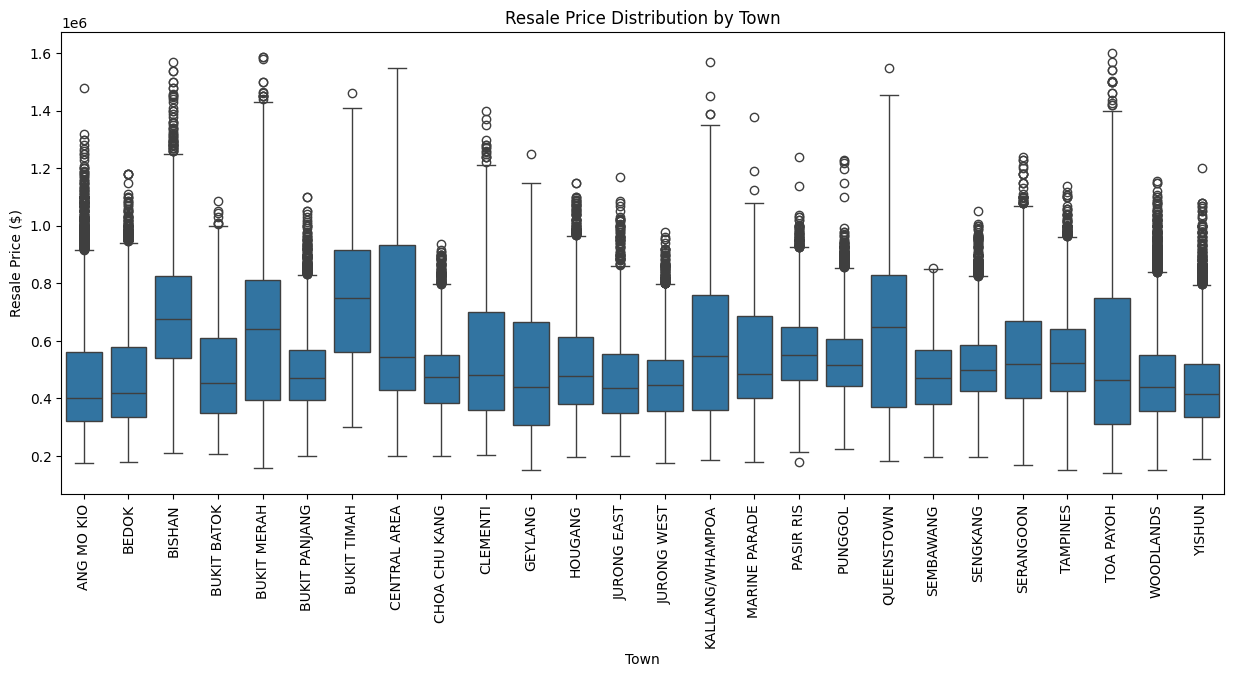

In [6]:
#boxplot

plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="town", y="resale_price")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title("Resale Price Distribution by Town")
plt.xlabel("Town")
plt.ylabel("Resale Price ($)")
plt.show()

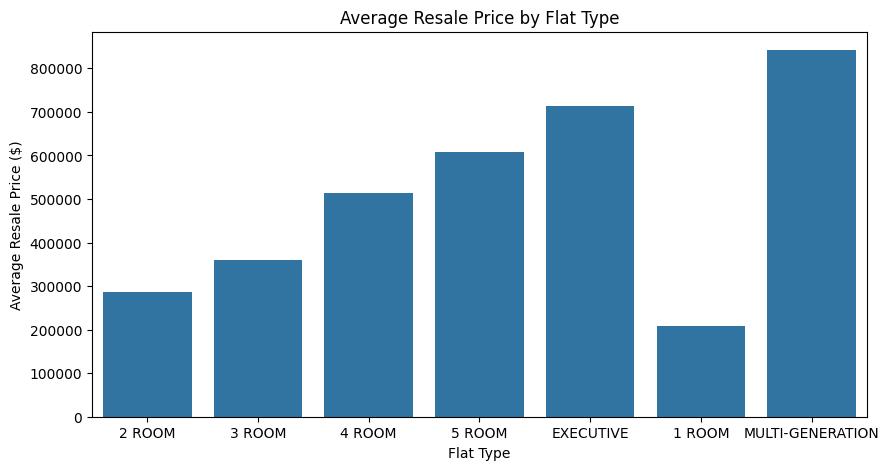

In [7]:
#barchart

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="flat_type", y="resale_price", estimator=lambda x: x.mean(), errorbar=None)
plt.title("Average Resale Price by Flat Type")
plt.xlabel("Flat Type")
plt.ylabel("Average Resale Price ($)")
plt.show()


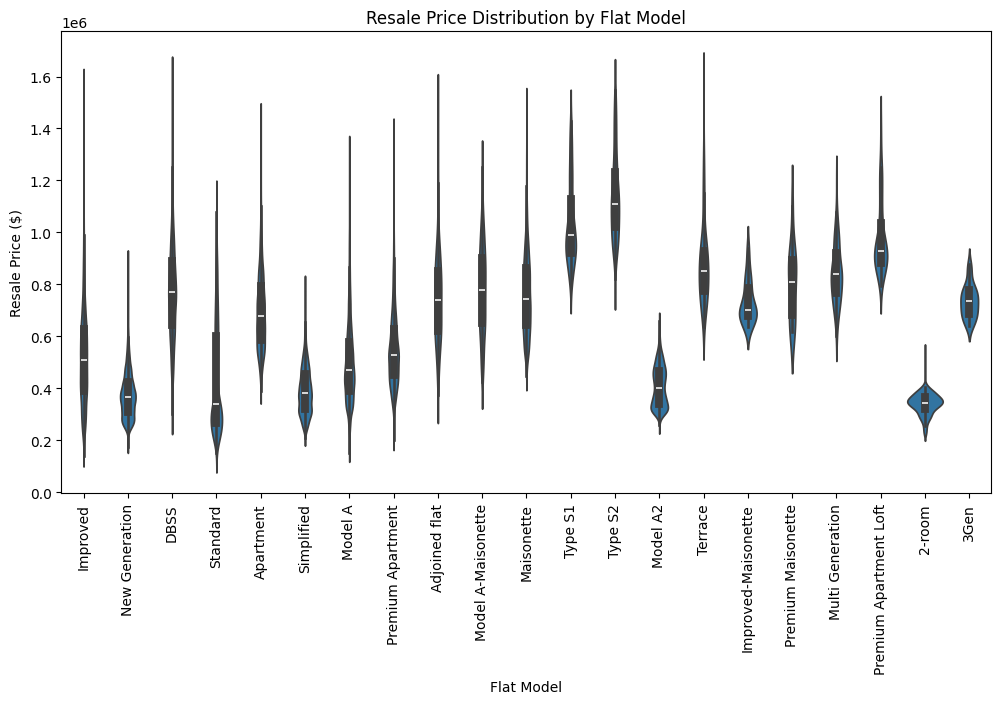

In [8]:
#price trends across flat models
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="flat_model", y="resale_price")
plt.xticks(rotation=90)  # Rotate labels
plt.title("Resale Price Distribution by Flat Model")
plt.xlabel("Flat Model")
plt.ylabel("Resale Price ($)")
plt.show()


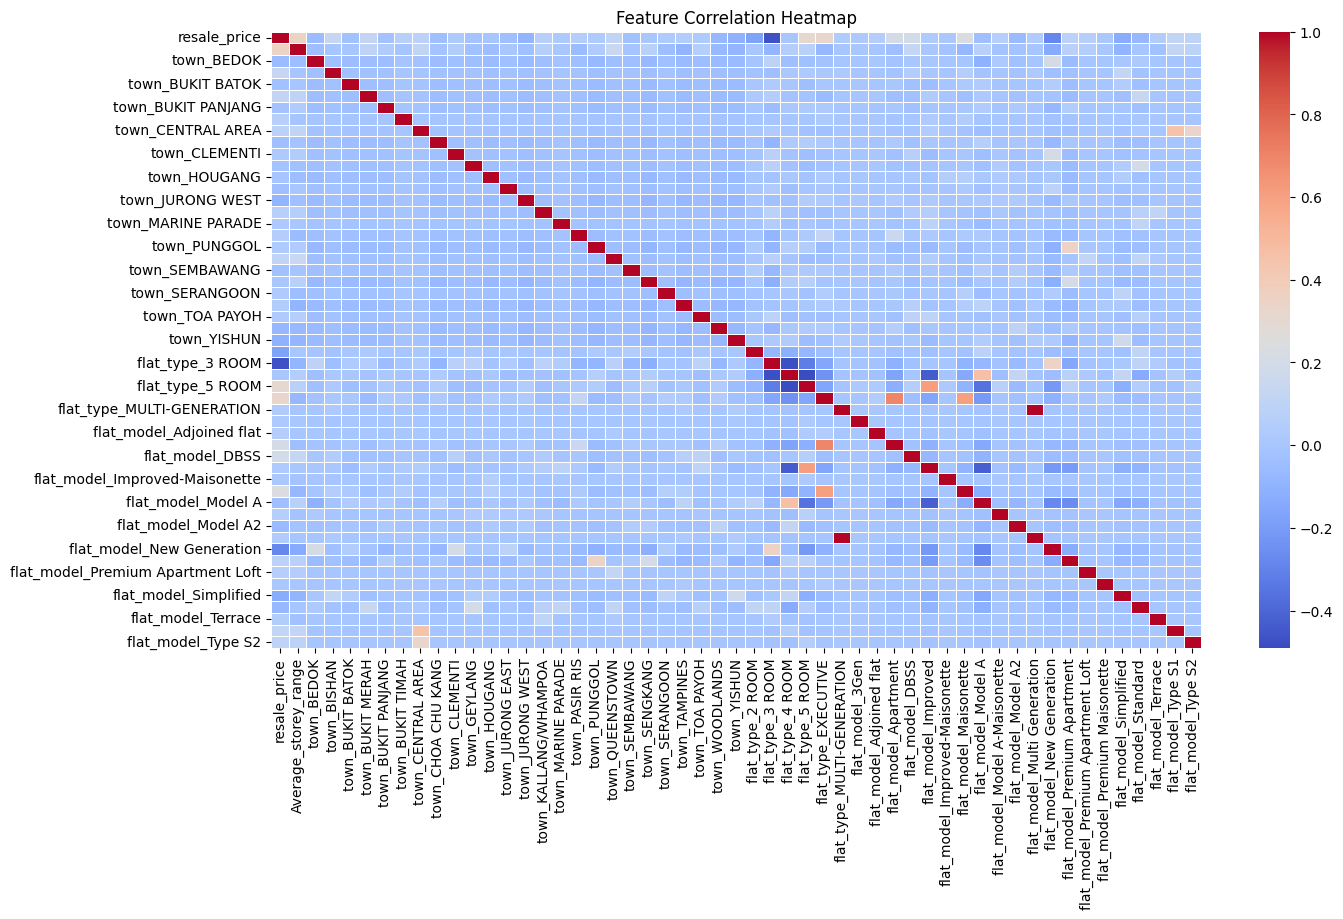

In [9]:
df_encoded = pd.get_dummies(df, columns=['town', 'flat_type', 'flat_model'], drop_first=True)

# Generate correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


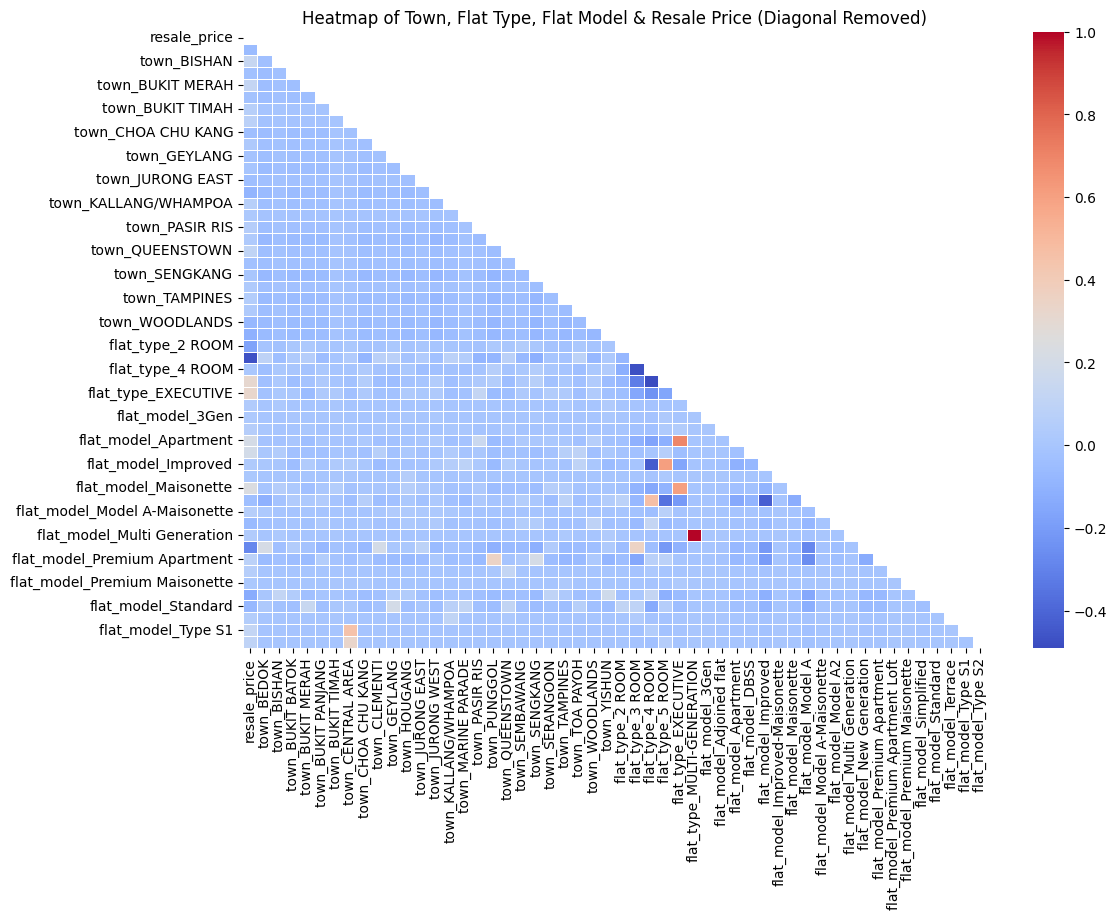

In [10]:
# One-hot encode categorical variables
import numpy as np


df_encoded = pd.get_dummies(df, columns=['town', 'flat_type', 'flat_model'], drop_first=True)

# Select relevant columns
selected_cols = [col for col in df_encoded.columns if 'resale_price' in col or 'town_' in col or 'flat_type_' in col or 'flat_model_' in col]

# Compute correlation matrix
corr_matrix = df_encoded[selected_cols].corr()

# Create a mask to hide the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with masked diagonal
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Town, Flat Type, Flat Model & Resale Price (Diagonal Removed)")
plt.show()

In [11]:
# Show descriptive statistics with 2 decimal places
pd.options.display.float_format = "{:.2f}".format  # ✅ Set float format globally

# Display formatted summary statistics
display(df.describe())


,resale_price,Average_storey_range
count,200945.00,200945.00
mean,510697.34,8.76
std,179027.89,5.94
min,140000.00,2.00
25%,380000.00,5.00
50%,480000.00,8.00
75%,610000.00,11.00
max,1600000.00,50.00


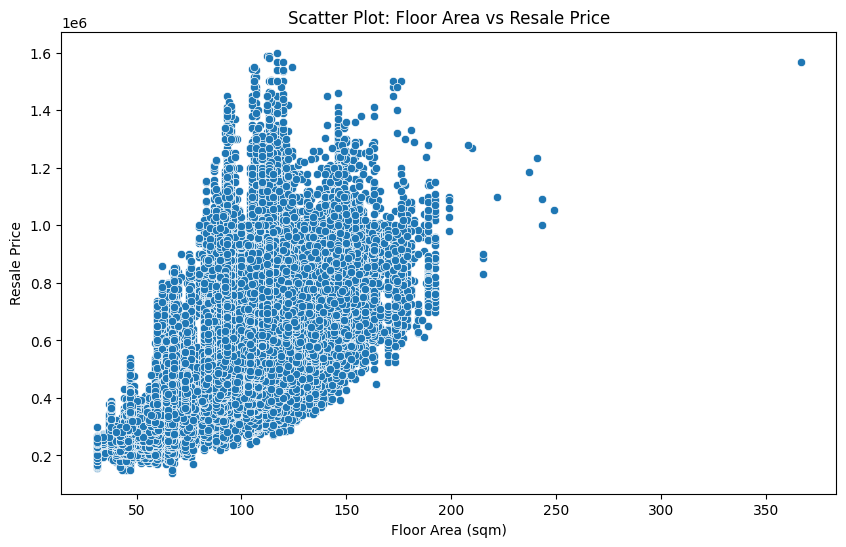

In [12]:
# Scatterplot

df1 = pd.read_csv("../Dataset/Resaleflatprices.csv")


plt.figure(figsize=(10,6))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df1)
plt.title('Scatter Plot: Floor Area vs Resale Price')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.show()

In [14]:
# Correlation and Regression Analysis

corr_coef, p_value = pearsonr(df['Average_storey_range'], df['resale_price'])
print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

X = sm.add_constant(df['Average_storey_range'])
model = sm.OLS(df['resale_price'], X).fit()
print(model.summary())

Pearson correlation coefficient: 0.3474776177150827
P-value: 0.0
                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                 2.759e+04
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:23:42   Log-Likelihood:            -2.7027e+06
No. Observations:              200945   AIC:                         5.405e+06
Df Residuals:                  200943   BIC:                         5.405e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

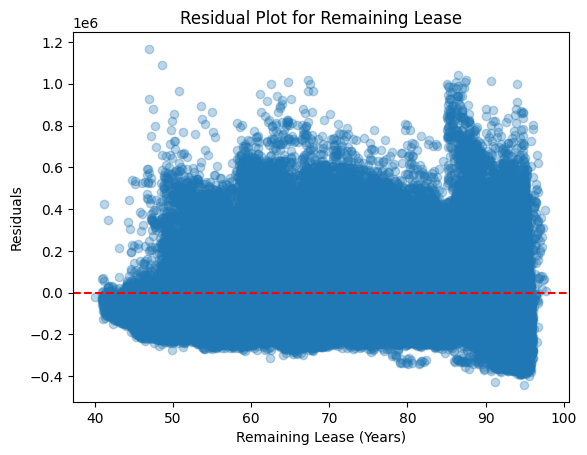

In [15]:
# Residual plot

def convert_lease(lease_str):
    parts = lease_str.split()
    if len(parts) == 2:  # e.g., "50 years"
        years = int(parts[0])
        months = 0
    elif len(parts) >= 3:  # e.g., "74 years 08 months"
        years = int(parts[0])
        months = int(parts[2])
    else:
        # Handle unexpected format, e.g., return 0 or raise an error
        years = 0
        months = 0
    return years + months / 12

df1['remaining_lease'] = df1['remaining_lease'].apply(convert_lease)


# Simple linear regression
X = sm.add_constant(df1['remaining_lease'])
model = sm.OLS(df1['resale_price'], X).fit()

# Residual plot
fitted_vals = model.fittedvalues
residuals = model.resid

plt.scatter(df1['remaining_lease'], residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Remaining Lease (Years)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Remaining Lease')
plt.show()

In [16]:


X= sm.add_constant(df1['remaining_lease'])
model = sm.OLS(df1['resale_price'], X).fit()
print(model.summary())  # Check p-value of remaining_lease

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                 2.199e+04
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:23:51   Log-Likelihood:            -2.7052e+06
No. Observations:              200945   AIC:                         5.410e+06
Df Residuals:                  200943   BIC:                         5.410e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.137e+05   2038.481    1